In [2]:
#!pip install zeus-mcmc
#python -m pip install drawdata
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
import zeus
import pandas as pd
from drawdata import ScatterWidget

In [39]:
𝘄𝗶𝗱𝗴𝗲𝘁 = 𝗦𝗰𝗮𝘁𝘁𝗲𝗿𝗪𝗶𝗱𝗴𝗲𝘁() 
𝘄𝗶𝗱𝗴𝗲𝘁 

ScatterWidget()

In [48]:
W = widget.data_as_pandas
W['sigma'] = np.random.uniform(0, 50, size=len(W))
W

,x,y,color,label,sigma
0,135.654414,497.905993,#1f77b4,a,46.346686
1,132.442968,479.677624,#1f77b4,a,13.130385
2,138.348651,485.995481,#1f77b4,a,11.022530
3,146.611588,500.852649,#1f77b4,a,26.984489
4,133.804289,482.417232,#1f77b4,a,44.848609
...,...,...,...,...,...
595,223.174577,89.577024,#1f77b4,a,24.014626
596,230.378777,90.517143,#1f77b4,a,30.851619
597,219.429934,82.947098,#1f77b4,a,12.509106
598,228.440668,85.702101,#1f77b4,a,33.729378


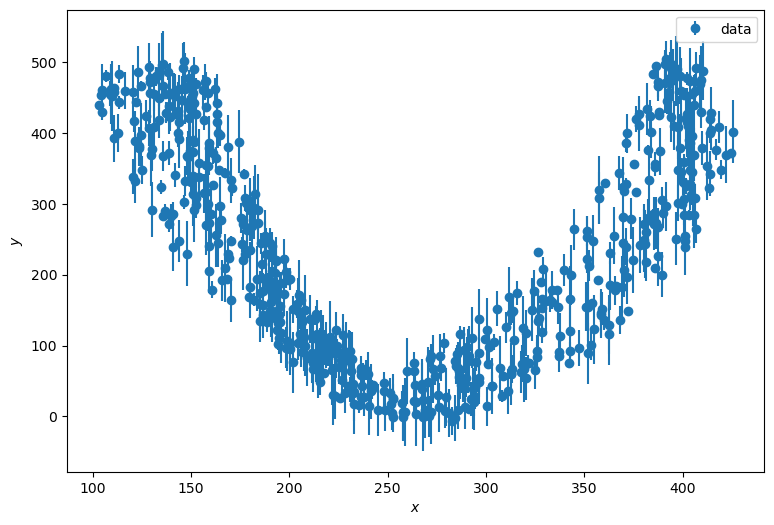

In [49]:
plt.figure(figsize=(9,6))
plt.errorbar(W['x'], W['y'], yerr=W['sigma'], fmt="o", label='data')
#plt.plot(W['x'], straight_line(W['x'], m_true, c_true), '-', lw=2, label='model')
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

In [ ]:
def logprior(theta):
    ''' The natural logarithm of the prior probability. '''
    lp = 0.
    # unpack the model parameters from the tuple
    a, b, c = theta
    # uniform prior on c
    cmin = -10. # lower range of prior
    cmax = 10.  # upper range of prior
    # set prior to 1 (log prior to 0) if in the range and zero (-inf) outside the range
    lp = 0. if cmin < c < cmax else -np.inf
    # Gaussian prior on m
    mmu = 3.     # mean of the Gaussian prior
    msigma = 10. # standard deviation of the Gaussian prior
    lp -= 0.5*((m - mmu)/msigma)**2
    return lp